In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from operator import add
import datetime
import os
import sys
import matplotlib
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 1000)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import pylab

# Note: Here "Clearwater River upstream Mirror River" is equavalent to Clear Water River Area-1 (CR A1) in the water data files.

In [2]:
pwd

'C:\\Users\\ssabahi\\Desktop\\Plot_Generator\\Feb_18_2020\\NexGen'

In [3]:
mode='Northern Pike Fish'
# mode='White Fish'

In [4]:
start_date = datetime.datetime(2017, 1, 1)
end_date= datetime.datetime(2020, 3, 20)
#timestep in the impact output files
time_step = 0.08333333

The Information Needed to Enter
Specify which IMPACT_locations should be plotted for comparison
Use EXACTLY the name that IMPACT uses! 
This code plots 3 IMPACT locations. For more locations we 
need to add more if statement in the plotting section and 
modift IMPACT_color_ls.

In [5]:
if mode=='Northern Pike Fish':
    IMPACT_locations = ['Broach Lake', 'Patterson Lake North West', 'Clearwater River upstream Mirror River']
if mode=='White Fish':
    IMPACT_locations = ['Broach Lake', 'Patterson Lake North West', 'Clearwater River upstream Mirror River']


Color lists for plotting

In [6]:
IMPACT_color_ls = ['navy','coral','g']
geom_m_EMMA_ls = ['black']
local_inflow_mean_color_ls = ['steelblue']
QG_color_ls = ['deepskyblue']

In [7]:
IMPACT_folder = 'NextGen_MT.ps55_Outputs'

In [8]:
#IMPACT results should be rounded for better plotting.
IMPACT_decimal_place = 7
#a list of all impact outputs
impactfile_list = os.listdir(IMPACT_folder)
IMPACT_output_files = []

In [9]:

# To select different colors go to the following website:
     # https://www.rapidtables.com/web/css/css-color.html
# The cols_ls_1 is used for lakes with one samplig station.
cols_ls_1 = ['blue','green','red','saddlebrown','darkred','khaki','mediumseagreen', 'cyan', 'mediumslateblue', 'olive','saddlebrown',
          'violet','dimgray','deepskyblue','green','black','darkslategray','darkred','teal','darkgreen', 'cyan', 'mediumslateblue', 'olive','saddlebrown',
          'violet','dimgray','blue','green','black','darkslategray','darkred','khaki','darkgreen', 'cyan', 'mediumslateblue', 'olive','saddlebrown',
          'violet','dimgray','blue','green','black','darkslategray','darkred','khaki','darkgreen', 'cyan', 'mediumslateblue', 'olive','saddlebrown',
          'violet','dimgray']

    # The cols_ls_2 is used for lakes with more than one samplig station.
cols_ls_2 = ['blue','green','black','darkred','khaki','yellow'] 


Specify which EMMA_locations should be plotted and which files contain the data

In [10]:
if mode=='Northern Pike Fish':

    EMMA_locations = ['PL','BeetL','FL','NL','LLI','BL','CR']
    EMMA_folder_file = './EMMA/FFW_NP.xlsx'

    #Select one lake from the IMPACT excel file results for water COPCs - Used for ploting
    loc_name_plot = 'Forrest Lake north basin for Northern pike Conc'
   
    #In case EMMA locations and IMPACT locations are different - set aliases
    EMMA_location_alias = ['Patterson Lake Northwest Area-1','Beet Lake Area-1', 'Forrst Lake Area-2',
                           'Naomi lake','Lloyd Lake Input','Broach Lake Area-2','Clear Water River Area-1'] 
    #set the markers for plotting
    EMMA_marker_ls = ["o","v","^","<",">","s","D","d",
                  "p","H","X","o","v","^","<",">",
                  "s","D"]

    #Rename the COPC names based on the lab data
    COPCs_dic = {'As':'Arsenic','COND':'Conductivity (Field)',
                          'Ca+':'Calcium','Ca':'Calcium','Cd':'Cadmium',
                          'Cl-':'Chloride','Cl':'Chloride','Co':'Cobalt',
                           'V':'Vanadium','Cr':'Chromium', 'Cs':'Cesium',
                          'Cu':'Copper', 'Fe':'Iron','NO3':'Nitrate',
                          'Mg+':'Magnesium', 'Mg':'Magnesium','Mn':'Manganese',
                          'Mo':'Molybdenum',
                          'NH3':'Ammonia as N','Na':'Sodium',
                          'NO3-':'Nitrate', 'Na+':'Sodium',
                          'Ni':'Nickel', 'Pb':'Lead', 'Pb-210':'Lead-210',
                          'Po-210':'Polonium-210', 'Ra-226':'Radium-226',
                          'Rn-222':'Radon-222', 'SO4':'Sulphate', 
                          'Se':'Selenium', 'Th-230':'Thorium-230',
                          'U':'Uranium', 'U-234':'Uranium-234',
                          'U-238':'Uranium-238', 
                          'Zn':'Zinc'}

    
#         if ( file_name.endswith('Northern pike Conc.xls') or file_name.endswith('Whitefish Conc.xls') ) :
#             IMPACT_output_files.append(file_name)

    for file_name in impactfile_list:
        if ( file_name.endswith('Northern pike Conc.xls') ) :
            IMPACT_output_files.append(file_name)
            

            

            
if mode=='White Fish':

    EMMA_locations = ['PL','BeetL','FL','NL','LLI','BL','CR']
    EMMA_folder_file = './EMMA/FFW_LW.xlsx'

    #Select one lake from the IMPACT excel file results for water COPCs - Used for ploting
    loc_name_plot = 'Forrest Lake north basin for Whitefish Conc'

    #In case EMMA locations and IMPACT locations are different - set aliases
    EMMA_location_alias = ['Patterson Lake Northwest Area-1','Beet Lake Area-1', 'Forrst Lake Area-2',
                           'Naomi lake','Lloyd Lake Input','Broach Lake Area-2','Clear Water River Area-1'] 
    #set the markers for plotting
    EMMA_marker_ls = ["o","v","^","<",">","s","D","d",
                  "p","H","X","o","v","^","<",">",
                  "s","D"]

    #Rename the COPC names based on the lab data
    COPCs_dic = {'As':'Arsenic','COND':'Conductivity (Field)',
                          'Ca+':'Calcium','Ca':'Calcium','Cd':'Cadmium',
                          'Cl-':'Chloride','Cl':'Chloride','Co':'Cobalt',
                           'V':'Vanadium','Cr':'Chromium', 'Cs':'Cesium',
                          'Cu':'Copper', 'Fe':'Iron','NO3':'Nitrate',
                          'Mg+':'Magnesium', 'Mg':'Magnesium','Mn':'Manganese',
                          'Mo':'Molybdenum',
                          'NH3':'Ammonia as N','Na':'Sodium',
                          'NO3-':'Nitrate', 'Na+':'Sodium',
                          'Ni':'Nickel', 'Pb':'Lead', 'Pb-210':'Lead-210',
                          'Po-210':'Polonium-210', 'Ra-226':'Radium-226',
                          'Rn-222':'Radon-222', 'SO4':'Sulphate', 
                          'Se':'Selenium', 'Th-230':'Thorium-230',
                          'U':'Uranium', 'U-234':'Uranium-234',
                          'U-238':'Uranium-238', 
                          'Zn':'Zinc'}

    
#         if ( file_name.endswith('Northern pike Conc.xls') or file_name.endswith('Whitefish Conc.xls') ) :
#             IMPACT_output_files.append(file_name)

    for file_name in impactfile_list:
        if ( file_name.endswith('Whitefish Conc.xls') ) :
            IMPACT_output_files.append(file_name)
            



In [11]:
IMPACT_output_files

['Beet Lake for Northern pike Conc.xls',
 'Broach Lake for Northern pike Conc.xls',
 'Clearwater River upstream Mirror River for Northern pike Conc.xls',
 'Forrest Lake north basin for Northern pike Conc.xls',
 'Lloyd Lake Inlet for Northern pike Conc.xls',
 'Patterson Lake North West for Northern pike Conc.xls',
 'Patterson Lake South for Northern pike Conc.xls']

In [12]:
EMMA_file_sheet_name = 'FigureTable'
EMMA_file_sheet_name_stat = 'Stats_a_Entire Query Time' 

In [13]:
# this dataframe is used to plot geometric means of COPCs
local_inflow_folder_file = './Local_Inflow/Local_Inflow.xlsx'
local_inflow_file_sheet_name = 'WaterBalance_output'

specify guidelines file

Output saved locations

In [14]:
if mode=='Northern Pike Fish':
    
    IMPACT_NPF_plots_folder = './plots/Impact_Plots_'+str(mode)
    IMPACT_EMMA_NPF_Plots_folder = './plots/IMAPCT_EMMA_Plots_'+str(mode)
    os.makedirs(IMPACT_NPF_plots_folder,exist_ok=True)
    os.makedirs(IMPACT_EMMA_NPF_Plots_folder,exist_ok=True)

if mode=='White Fish':
    
    IMPACT_WF_plots_folder = './plots/Impact_Plots_'+str(mode)
    IMPACT_EMMA_WF_Plots_folder = './plots/IMAPCT_EMMA_Plots_'+str(mode)
    os.makedirs(IMPACT_WF_plots_folder,exist_ok=True)
    os.makedirs(IMPACT_EMMA_WF_Plots_folder,exist_ok=True)


Import the raw data
Datafrmae 1- EMMA
Used to plot the sampled data-Scatter plot
Here we need to enter the directory where the EMMA file is located and 
then mention the name of the excel file and respective sheets

In [15]:
#TODO: the skipfooter business is super risky, cutting off elements potentially

EMMA_df = pd.read_excel(EMMA_folder_file, sheet_name=EMMA_file_sheet_name)
EMMA_Stat_df = pd.read_excel(EMMA_folder_file, sheet_name=EMMA_file_sheet_name_stat,skiprows=3, skipfooter = 4)
EMMA_Stat_df.drop(['Unnamed: 0'], axis=1, inplace=True)
EMMA_df_header1 = list(EMMA_df.iloc[2,:5])
EMMA_df_header2 = list( map(add, list(map(str,EMMA_df.iloc[0,:])),  list(map(str,EMMA_df.iloc[1,:])) ))
EMMA_df_header2 = EMMA_df_header2[5:]
EMMA_df_header = (EMMA_df_header1+EMMA_df_header2)

#remove redundant rows
EMMA_df.drop(EMMA_df.index[[0,1,2]], inplace=True)
EMMA_df.columns = EMMA_df_header
print('The EMMA dataset has '+str(len(EMMA_locations))+ ' locations for the '+str(mode)+' sampling data')


EMMA_Stat_col_ls = ['Minimum', 'Percentile_5th', 'Percentile_50th', 'Percentile_95th', 'Maximum', 'Arithmetic_Mean', 'Geometric_Mean']
copcs_EMMA = EMMA_df.Parameter_ID.unique()

EMMA_col_TF_ls = list( (EMMA_df.columns[EMMA_df.columns.str.endswith('True')]) | (EMMA_df.columns[EMMA_df.columns.str.endswith('False')]) )


The EMMA dataset has 7 locations for the Northern Pike Fish sampling data


In [16]:
EMMA_col_TF_ls

['BLFalse',
 'BLTrue',
 'BeetLFalse',
 'BeetLTrue',
 'CRFalse',
 'CRTrue',
 'FLFalse',
 'FLTrue',
 'LLIFalse',
 'LLITrue',
 'NLFalse',
 'NLTrue',
 'PLFalse',
 'PLTrue']

In [17]:
if mode=='Northern Pike Fish':
    #unit_micro = list(EMMA_df[EMMA_df['Units']=='µg/L']['Parameter_ID'].unique())
    #Change the microgram/l to miligram/l to be consistent with other dataframe data
    EMMA_df.loc[EMMA_df['Units']=='µg/L', EMMA_col_TF_ls] = EMMA_df.loc[EMMA_df['Units']=='µg/L', EMMA_col_TF_ls] * 0.001
    EMMA_Stat_df.loc[EMMA_Stat_df['Units']=='µg/L', EMMA_Stat_col_ls] = EMMA_Stat_df.loc[EMMA_Stat_df['Units']=='µg/L', EMMA_Stat_col_ls] * 0.001
    #TODO: maybe also rename the units?
elif mode=='White Fish': 
    #in sediment data everything is given in microg/mg which is equivalent to the mg/kg of impact
    EMMA_df.loc[EMMA_df['Units']=='Bq/g', EMMA_col_TF_ls] = EMMA_df.loc[EMMA_df['Units']=='Bq/g', EMMA_col_TF_ls] * 1000
    EMMA_Stat_df.loc[EMMA_Stat_df['Units']=='Bq/g', EMMA_Stat_col_ls] = EMMA_Stat_df.loc[EMMA_Stat_df['Units']=='Bq/g', EMMA_Stat_col_ls] * 1000
    
else:
    print('Enter an analysis mode at the top!')

Dataframe 2-Local Inflow File
Used to plot COPCs' Geometric mean followed by the sediment-water interaction

In [18]:
IMPACT_output_files

['Beet Lake for Northern pike Conc.xls',
 'Broach Lake for Northern pike Conc.xls',
 'Clearwater River upstream Mirror River for Northern pike Conc.xls',
 'Forrest Lake north basin for Northern pike Conc.xls',
 'Lloyd Lake Inlet for Northern pike Conc.xls',
 'Patterson Lake North West for Northern pike Conc.xls',
 'Patterson Lake South for Northern pike Conc.xls']

In [19]:
IMPACT_locations

['Broach Lake',
 'Patterson Lake North West',
 'Clearwater River upstream Mirror River']

In [20]:
for file in IMPACT_output_files:
    #print(file)
    loc_name = file.split('for')[0]
    loc_name = loc_name.strip() 

In [21]:
loc_name

'Patterson Lake South'

In [22]:
local_inflow_df = pd.read_excel(local_inflow_folder_file, sheet_name=local_inflow_file_sheet_name, skiprows=[0])
local_inflow_df.set_index('Contaminants', inplace=True)

#Rename the contaminant names based on the EMMA fromat
local_inflow_df.rename(columns = COPCs_dic,inplace=True)

#Creating a dictionary of selected IMPACT_locations defined above with 
#respective concentrations and time and rename the contaminants based on the 
#EMMA format     

IMPACT_df = {}

for file in IMPACT_output_files:
    #print(file)
    loc_name = file.split('for')[0]
    loc_name = loc_name.strip() # To remove unncessary white space
    for l in IMPACT_locations:
        if l == loc_name:
            print('Location ' + str(loc_name) + ' was found.')
            IMPACT_df_temp = pd.read_csv(IMPACT_folder + '/' + file, sep='\t', skiprows=[7], header=6)
            IMPACT_df_temp = IMPACT_df_temp.drop(IMPACT_df_temp.columns[IMPACT_df_temp.columns.str.startswith('Un')],1)
            IMPACT_df_temp['Timedelta'] = pd.to_timedelta(IMPACT_df_temp['Time'], unit='Y')
            IMPACT_df_temp['Date_Time'] = start_date + IMPACT_df_temp['Timedelta']
                
            IMPACT_df_temp.drop(columns=['Timedelta'], inplace=True) # remove this to make the next steps easier
            
            IMPACT_df_temp = IMPACT_df_temp[IMPACT_df_temp['Date_Time']<end_date]##########
    
            IMPACT_df[l] = IMPACT_df_temp
                
            IMPACT_df[l].rename(columns = COPCs_dic,inplace=True)            


Location Broach Lake was found.
Location Clearwater River upstream Mirror River was found.
Location Patterson Lake North West was found.


In [23]:
local_inflow_df

,Arsenic,Conductivity (Field),Calcium,Cadmium,Chloride,Cobalt,Chromium,Cesium,Copper,Iron,Magnesium,Manganese,Molybdenum,Nitrate (as N),Ammonia (as N),Ammonia as N,Nitrate,Sodium,Nickel,Lead,Lead-210,Polonium-210,Radium-226,Radon-222,Sulphate,Selenium,Thorium-230,Uranium,Uranium-234,Uranium-238,Vanadium,Zinc
Contaminants,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Sediment_input,10.478686,0.00000,23.715779,0.257873,3.707376,1.311782,5.485779,0.932560,2.352616,334.798058,8.966513,1257.059971,0.580901,0.112094,0.121854,0.000207,0.310151,10.799581,2.832545,3.155555,194.479000,197.843436,64.703058,0,9.405923,0.308154,20.809830,0.516141,6.377439,6.377439,0.337880,12.958253
Water_meas,0.000130,23.26662,2.717433,0.000010,0.424804,0.000100,0.000500,0.000100,0.000213,0.067573,1.027413,0.012184,0.000102,0.012844,0.013962,0.000024,0.035538,1.237452,0.000104,0.000102,0.020238,0.005153,0.005537,0,1.077762,0.000100,0.010000,0.000101,6.377439,6.377439,0.000113,0.000890
Water_calc,0.000130,0.00000,2.717433,0.000018,0.424804,0.000526,0.059282,0.000100,0.000788,0.067573,1.027413,0.012184,0.000184,0.012844,0.013962,0.000024,0.035538,1.237452,0.000326,0.000033,0.002743,0.002790,0.005538,0,1.077762,0.000016,0.009067,0.000027,0.000332,0.000332,0.000113,0.000890
Sediment_meas,3.195999,0.00000,1629.436000,0.257873,0.000000,1.311782,5.485779,0.176139,2.352616,16040.400000,536.727200,402.602800,0.580901,0.000000,0.000000,0.000000,0.000000,104.945000,2.832545,3.155555,194.479000,157.045100,27.608530,0,0.000000,0.308154,20.809830,0.516141,NaN,NaN,8.091691,13.990960


Read the file that will contain the units and format it to drop all the 
unnecessary stuff:
Remove the first 2 unnecessary columns from the first elements and one element 
from the lastvand add an another element called time to the end of the list
Becareful: To plot sediment outpots unit_ls = unit_ls[1:-1] because in 
sediment we dont have outflow (second elements)

In [24]:
# if mode=='water':
#     startcolumn=2
# elif mode=='sediment':
#     startcolumn=1
# else:
#     print('Enter an analysis mode at the top!')

In [25]:
unit_ls_path = './'+ IMPACT_folder +'/'+ loc_name_plot+ '.xls'
unit_ls = list(pd.read_csv(unit_ls_path, sep='\t',skiprows=6).iloc[0,:])
unit_ls = unit_ls[2:-1]

unit_ls.append('Year')

To check that we have the same COPCs for all dataframes.
The dataframe COPCs will be compared with COPCs in local inflow
If they are not of equal length some COPCs will have to be added.

In [26]:
copcs_EMMA

array(['% Moisture', 'Aluminum', 'Antimony', 'Arsenic', 'Barium',
       'Beryllium', 'Boron', 'Cadmium', 'Chromium', 'Cobalt', 'Copper',
       'Iron', 'Lead', 'Lead-210', 'Manganese', 'Mercury', 'Molybdenum',
       'Nickel', 'Polonium-210', 'Radium-226', 'Selenium', 'Silver',
       'Strontium', 'Thallium', 'Thorium-230', 'Tin', 'Titanium',
       'Uranium', 'Vanadium', 'Zinc'], dtype=object)

In [27]:
copcs_local_inflow = local_inflow_df.columns

if len(copcs_local_inflow)==len(copcs_EMMA):
    print(f'The size of copcs_EMMA is: {len(copcs_EMMA)}, equal to the size of copcs_local_inflow: {len(copcs_local_inflow)}' )
else:
    print('The copc arrays are not of equal length, we need to add the missing ones.')

copcs_missing =  list(set(copcs_local_inflow)-set(copcs_EMMA))
print('The missing copcs are '+ str(copcs_missing))

for m in copcs_missing:
    #TODO:correct units maybe?
    if mode=='Northern Pike Fish':
        toAdd= ['NPF_' + str(m).lower() + '_mg/l', str(m), 'mg/L', start_date, end_date]
    elif mode=='White Fish':
        toAdd= ['WF_' + str(m).lower() + '_mg/kg', str(m), 'mg/kg', start_date,end_date]
    else:
        print('Enter an analysis mode at the top!')
    
    EMMA_df = pd.concat([EMMA_df, pd.DataFrame([toAdd + ([np.nan] * (EMMA_df.shape[1]-len(toAdd)))], columns=EMMA_df.columns)], ignore_index=True)
    EMMA_Stat_df = pd.concat([EMMA_Stat_df, pd.DataFrame([toAdd + ([np.nan] * (EMMA_Stat_df.shape[1]-len(toAdd)))], columns=EMMA_Stat_df.columns)], ignore_index=True)

The copc arrays are not of equal length, we need to add the missing ones.
The missing copcs are ['Calcium', 'Uranium-238', 'Uranium-234', 'Chloride', 'Sodium', 'Ammonia (as N)', 'Radon-222', 'Nitrate (as N)', 'Conductivity (Field)', 'Sulphate', 'Magnesium', 'Cesium', 'Nitrate', 'Ammonia as N']


# Plotting the IMPACT Dataframe

In [28]:
IMPACT_df.keys()

dict_keys(['Broach Lake', 'Clearwater River upstream Mirror River', 'Patterson Lake North West'])

In [29]:
#format input dates
#TODO: this needs to change to the dates that we enter at the top
dates_IMPACT = matplotlib.dates.date2num(IMPACT_df['Broach Lake']['Date_Time'])
#round IMPACT data:
for i in (IMPACT_df.keys()):
    IMPACT_df[i] = IMPACT_df[i].round(IMPACT_decimal_place)

In [30]:
#here is where the plotting happens:
fig, axes = plt.subplots(nrows=8, ncols=4, dpi = 200)

fig.set_figwidth(10)
fig.set_figheight(20)

axes = axes.ravel()

if mode=='Northern Pike Fish':
    for m,i in enumerate(IMPACT_locations):

        for j,k in enumerate(IMPACT_df[i].columns[2:-1]):

            if m==0:
                axes[j].plot_date(dates_IMPACT, IMPACT_df[i][k], ls='--',marker= '',c=IMPACT_color_ls[m], label=i)
                axes[j].set_ylabel(k+ ' ' + '(' + unit_ls[j] + ')', fontsize=5)

                axes[j].xaxis.set_major_locator(mdates.YearLocator(1)) # 10 years of interval
                axes[j].xaxis.set_major_formatter(DateFormatter("%Y"))

                axes[j].tick_params(labelsize = 5)

            if m==1:
                axes[j].plot_date(dates_IMPACT, IMPACT_df[i][k], ls='-.',marker='',c=IMPACT_color_ls[m], label=i)

            if m==2:
                axes[j].plot_date(dates_IMPACT, IMPACT_df[i][k], ls=':',marker='',c=IMPACT_color_ls[m], label=i)

            fig.tight_layout()

            bbox = axes[j].get_tightbbox(fig.canvas.get_renderer())
            fig.savefig(str(IMPACT_NPF_plots_folder)+'/'+"{}.png".format(k),
                  bbox_inches=bbox.transformed(fig.dpi_scale_trans.inverted()))    

            handles, labels = axes[j].get_legend_handles_labels()

    fig.savefig(str(IMPACT_NPF_plots_folder)+'/IMPACT.png')
    print('IMPACT figures are plotted and saved in '+str(IMPACT_NPF_plots_folder))
    plt.close('all')
    #print the labels
    leg_fig = pylab.figure(figsize=(5,3), dpi=200)
    leg_ax = fig.add_subplot(111)
    leg_fig.legend(handles, labels, 'center', ncol=1)
    leg_fig.savefig(str(IMPACT_NPF_plots_folder)+'/IMPACT_legend.png',bbox_inches='tight')
    
    
    
if mode=='White Fish':
    for m,i in enumerate(IMPACT_locations):

        for j,k in enumerate(IMPACT_df[i].columns[2:-1]):

            if m==0:
                axes[j].plot_date(dates_IMPACT, IMPACT_df[i][k], ls='--',marker= '',c=IMPACT_color_ls[m], label=i)
                axes[j].set_ylabel(k+ ' ' + '(' + unit_ls[j] + ')', fontsize=5)

                axes[j].xaxis.set_major_locator(mdates.YearLocator(1)) # 10 years of interval
                axes[j].xaxis.set_major_formatter(DateFormatter("%Y"))

                axes[j].tick_params(labelsize = 5)

            if m==1:
                axes[j].plot_date(dates_IMPACT, IMPACT_df[i][k], ls='-.',marker='',c=IMPACT_color_ls[m], label=i)

            if m==2:
                axes[j].plot_date(dates_IMPACT, IMPACT_df[i][k], ls=':',marker='',c=IMPACT_color_ls[m], label=i)

            fig.tight_layout()

            bbox = axes[j].get_tightbbox(fig.canvas.get_renderer())
            fig.savefig(str(IMPACT_WF_plots_folder)+'/'+"{}.png".format(k),
                  bbox_inches=bbox.transformed(fig.dpi_scale_trans.inverted()))    

            handles, labels = axes[j].get_legend_handles_labels()

    fig.savefig(str(IMPACT_WF_plots_folder)+'/IMPACT.png')
    print('IMPACT figures are plotted and saved in '+str(IMPACT_WF_plots_folder))
    plt.close('all')
    #print the labels
    leg_fig = pylab.figure(figsize=(5,3), dpi=200)
    leg_ax = fig.add_subplot(111)
    leg_fig.legend(handles, labels, 'center', ncol=1)
    leg_fig.savefig(str(IMPACT_WF_plots_folder)+'/IMPACT_legend.png',bbox_inches='tight')

IMPACT figures are plotted and saved in ./plots/Impact_Plots_Northern Pike Fish


<Figure size 1000x600 with 0 Axes>

Adding EMMA data
Creating a dictionary of EMMA dataframes for the selected EMMA_locations

EMMA_df_s == Selected EMMA_dfCreating a dictionary of EMMA dataframes for the selected EMMA_locations
EMMA_df_s == Selected EMMA_df

Then:
Creating two sets of dataframes for the measurements above and below detection limit
T=Below DL
F=Above DL

To apply the end_date to EMMA
EMMA_df = EMMA_df[EMMA_df['Sample_DateTime']<end_date]
This length of this list is used for marker shapes
len(EMMA_location_alias)

In [31]:
EMMA_df = EMMA_df[EMMA_df['Sample_DateTime']<end_date]

In [32]:
EMMA_df_s = {} # Selected dataframe

for l in EMMA_locations:
    EMMA_df_temp = EMMA_df.filter(regex=(l))#filters all column entrys based on the name l
    EMMA_df_s[l] = EMMA_df_temp

print('The selected EMMA sampling locations for plotting are: '+str(EMMA_df_s.keys()))

The selected EMMA sampling locations for plotting are: dict_keys(['PL', 'BeetL', 'FL', 'NL', 'LLI', 'BL', 'CR'])


In [33]:
# EMMA_df[EMMA_df['Parameter_ID']=='Vanadium']

seperate dfs for under and over DL

In [34]:
dates_EMMA = [pd.to_datetime(d) for d in EMMA_df['Sample_DateTime']]

dates_EMMA = matplotlib.dates.date2num(dates_EMMA)
EMMA_df_s_T = {}
EMMA_df_s_F = {}

for l in EMMA_locations:
    EMMA_df_temp_T = EMMA_df_s[l][EMMA_df_s[l].columns[EMMA_df_s[l].columns.str.endswith('True')]]
    EMMA_df_s_T[l] =  pd.concat([EMMA_df[['Parameter_ID','Units']],EMMA_df_temp_T, EMMA_df['Sample_DateTime'],
                                 pd.DataFrame(dates_EMMA,columns=['Time']) ],axis=1) 
           
    EMMA_df_temp_F = EMMA_df_s[l][EMMA_df_s[l].columns[EMMA_df_s[l].columns.str.endswith('False')]]
    EMMA_df_s_F[l] = pd.concat([EMMA_df[['Parameter_ID','Units']],EMMA_df_temp_F, EMMA_df['Sample_DateTime'],
                               pd.DataFrame(dates_EMMA,columns=['Time'])],axis=1) 

Reading the WQG and SQG


In [35]:
# QG_df = pd.read_excel(QG_folder_file, sheet_name=QG_file_sheet_name)
# print('Quality guidelines from: '+str(QG_file_sheet_name))

plot the IMPACT, EMMA, with the measurement data and the Quality Guidelines


In [36]:
fig, axes = plt.subplots(nrows=32, ncols=1, dpi = 200)
#the nrows is a problem, here we have 27, if we ever have more we'll be plotting less

fig.set_figwidth(10)
fig.set_figheight(120)


axes = axes.ravel()#this combines multidimensional arrays to one dimensio, probably does nothing here

if mode=='Northern Pike Fish':
    for m,i in enumerate(IMPACT_locations): # Legend-location
        for n,j in enumerate(IMPACT_df[i].columns[2:-1]): # Label-concentration

            if m==0:

                axes[n].plot_date(dates_IMPACT, IMPACT_df[i][j], ls='--',marker= '',c=IMPACT_color_ls[m], label='IMPACT Prediction'+'-'+i)   # To plot IMPACT           
                axes[n].set_ylabel(j + ' ' + '(' + unit_ls[n] + ')', fontsize=8)            
                axes[n].xaxis.set_major_locator(mdates.YearLocator(1)) # 10 years of interval
                axes[n].xaxis.set_major_formatter(DateFormatter("%Y"))            
                axes[n].tick_params(labelsize = 8)

            if m==1:
                axes[n].plot_date(dates_IMPACT, IMPACT_df[i][j], ls='-.',marker='',c=IMPACT_color_ls[m], label='IMPACT Prediction'+'-'+i)

            if m==2:
                axes[n].plot_date(dates_IMPACT, IMPACT_df[i][j], ls=':',marker='',c=IMPACT_color_ls[m], label='IMPACT Prediction'+'-'+i)

                if len(EMMA_Stat_df.loc[EMMA_Stat_df['Parameter'] == j])==0:
                    continue
                geom_m_EMMA = EMMA_Stat_df.loc[EMMA_Stat_df['Parameter'] == j]['Geometric_Mean'].iloc[0]
                axes[n].plot_date([start_date,end_date],[geom_m_EMMA, geom_m_EMMA],ls='-',marker=' ',
                                  c=geom_m_EMMA_ls[0], label='Observed Geometric Mean')

                for p,l in enumerate(EMMA_locations):
                    #print(p,l)
                    grouped_F = EMMA_df_s_F[EMMA_locations[p]].groupby('Parameter_ID')
                    grouped_T = EMMA_df_s_T[EMMA_locations[p]].groupby('Parameter_ID')
                    if j in (grouped_T.describe().index): # To check if the concentration in EMMA-Sometimes because of the end date we might loose some concentrations
                        EMMA_copc_F_df = grouped_F.get_group(j)
                        EMMA_copc_T_df = grouped_T.get_group(j)

                        temp_ls_F = list(EMMA_copc_F_df.columns[EMMA_copc_F_df.columns.str.endswith('False')])
                        temp_ls_T = list(EMMA_copc_T_df.columns[EMMA_copc_T_df.columns.str.endswith('True')])

                        col_ls_temp_F_0 = EMMA_df_s_F[l].columns
                        col_ls_temp_F_1 = [s for s in col_ls_temp_F_0 if l in s]
                        label_F_ls = [word[:-5] for word in col_ls_temp_F_1]

                        col_ls_temp_T_0 = EMMA_df_s_T[l].columns
                        col_ls_temp_T_1 = [s for s in col_ls_temp_T_0 if l in s]
                        label_T_ls = [word[:-4] for word in col_ls_temp_T_1]


                        if len(EMMA_copc_T_df.columns)>5:

                                for o,k in enumerate(temp_ls_F): # To plot EMMA 
                                    axes[n].plot_date(EMMA_copc_F_df['Time'], EMMA_copc_F_df[k], marker=EMMA_marker_ls[p], markersize=5,c=cols_ls_2[o],
                                                      label='Observed Data'+'-'+ EMMA_location_alias[EMMA_locations.index(label_F_ls[o])] )  

                                for o,k in enumerate(temp_ls_T): # To plot EMMA
                                    axes[n].plot_date(EMMA_copc_T_df['Time'], EMMA_copc_T_df[k],
                                                      marker=EMMA_marker_ls[p], markerfacecolor='white',markersize=5,c=cols_ls_2[o],
                                                      label='Below Detection Limit'+'-'+EMMA_location_alias[EMMA_locations.index(label_T_ls[o])]) 
                        else:

                                for o,k in enumerate(temp_ls_F): # To plot EMMA 
                                    axes[n].plot_date(EMMA_copc_F_df['Time'], EMMA_copc_F_df[k], marker=EMMA_marker_ls[p], markersize=5,c=cols_ls_1[p],
                                                        label='Observed Data'+'-'+ EMMA_location_alias[EMMA_locations.index(label_F_ls[o])] )  

                                for o,k in enumerate(temp_ls_T): # To plot EMMA
                                    axes[n].plot_date(EMMA_copc_T_df['Time'], EMMA_copc_T_df[k],
                                                      marker=EMMA_marker_ls[p], markerfacecolor='white',markersize=5,c=cols_ls_1[p],
                                                      label='Below Detection Limit'+'-'+EMMA_location_alias[EMMA_locations.index(label_T_ls[o])])


                fig.tight_layout()

                bbox = axes[n].get_tightbbox(fig.canvas.get_renderer())
                fig.savefig(str(IMPACT_EMMA_NPF_Plots_folder)+'/'+"{}.png".format(j),
                      bbox_inches=bbox.transformed(fig.dpi_scale_trans.inverted()))    

                handles, labels = axes[n].get_legend_handles_labels()
    #print('IMPACT figures are plotted and saved in '+str(IMPACT_plots_folder))
    plt.close('all')
    leg_fig = pylab.figure(figsize=(5,3), dpi=200)
    leg_ax = fig.add_subplot(111)
    leg_fig.legend(handles, labels, 'center', ncol=3)
    leg_fig.savefig(str(IMPACT_EMMA_NPF_Plots_folder)+'/IMPACT_EMMA_legend.png',bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

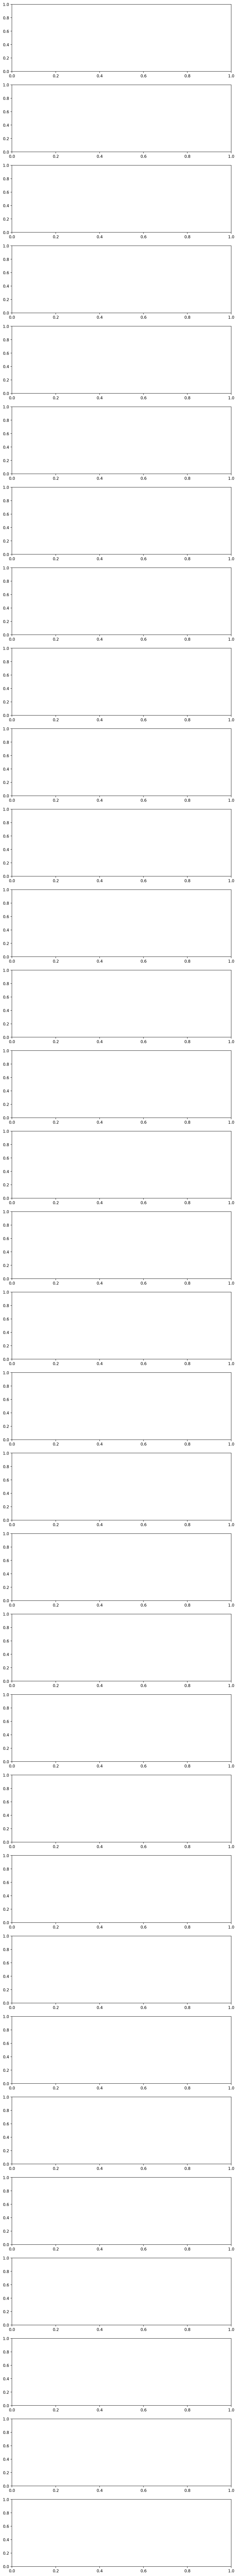

In [37]:
fig, axes = plt.subplots(nrows=32, ncols=1, dpi = 200)
#the nrows is a problem, here we have 27, if we ever have more we'll be plotting less

fig.set_figwidth(10)
fig.set_figheight(120)


axes = axes.ravel()#this combines multidimensional arrays to one dimensio, probably does nothing here

if mode=='White Fish':
    for m,i in enumerate(IMPACT_locations): # Legend-location
        for n,j in enumerate(IMPACT_df[i].columns[2:-1]): # Label-concentration

            if m==0:

                axes[n].plot_date(dates_IMPACT, IMPACT_df[i][j], ls='--',marker= '',c=IMPACT_color_ls[m], label='IMPACT Prediction'+'-'+i)   # To plot IMPACT           
                axes[n].set_ylabel(j + ' ' + '(' + unit_ls[n] + ')', fontsize=8)            
                axes[n].xaxis.set_major_locator(mdates.YearLocator(1)) # 10 years of interval
                axes[n].xaxis.set_major_formatter(DateFormatter("%Y"))            
                axes[n].tick_params(labelsize = 8)

            if m==1:
                axes[n].plot_date(dates_IMPACT, IMPACT_df[i][j], ls='-.',marker='',c=IMPACT_color_ls[m], label='IMPACT Prediction'+'-'+i)

            if m==2:
                axes[n].plot_date(dates_IMPACT, IMPACT_df[i][j], ls=':',marker='',c=IMPACT_color_ls[m], label='IMPACT Prediction'+'-'+i)

                if len(EMMA_Stat_df.loc[EMMA_Stat_df['Parameter'] == j])==0:
                    continue
                geom_m_EMMA = EMMA_Stat_df.loc[EMMA_Stat_df['Parameter'] == j]['Geometric_Mean'].iloc[0]
                axes[n].plot_date([start_date,end_date],[geom_m_EMMA, geom_m_EMMA],ls='-',marker=' ',
                                  c=geom_m_EMMA_ls[0], label='Observed Geometric Mean')

                for p,l in enumerate(EMMA_locations):
                    #print(p,l)
                    grouped_F = EMMA_df_s_F[EMMA_locations[p]].groupby('Parameter_ID')
                    grouped_T = EMMA_df_s_T[EMMA_locations[p]].groupby('Parameter_ID')
                    if j in (grouped_T.describe().index): # To check if the concentration in EMMA-Sometimes because of the end date we might loose some concentrations
                        EMMA_copc_F_df = grouped_F.get_group(j)
                        EMMA_copc_T_df = grouped_T.get_group(j)

                        temp_ls_F = list(EMMA_copc_F_df.columns[EMMA_copc_F_df.columns.str.endswith('False')])
                        temp_ls_T = list(EMMA_copc_T_df.columns[EMMA_copc_T_df.columns.str.endswith('True')])

                        col_ls_temp_F_0 = EMMA_df_s_F[l].columns
                        col_ls_temp_F_1 = [s for s in col_ls_temp_F_0 if l in s]
                        label_F_ls = [word[:-5] for word in col_ls_temp_F_1]

                        col_ls_temp_T_0 = EMMA_df_s_T[l].columns
                        col_ls_temp_T_1 = [s for s in col_ls_temp_T_0 if l in s]
                        label_T_ls = [word[:-4] for word in col_ls_temp_T_1]


                        if len(EMMA_copc_T_df.columns)>5:

                                for o,k in enumerate(temp_ls_F): # To plot EMMA 
                                    axes[n].plot_date(EMMA_copc_F_df['Time'], EMMA_copc_F_df[k], marker=EMMA_marker_ls[p], markersize=5,c=cols_ls_2[o],
                                                      label='Observed Data'+'-'+ EMMA_location_alias[EMMA_locations.index(label_F_ls[o])] )  

                                for o,k in enumerate(temp_ls_T): # To plot EMMA
                                    axes[n].plot_date(EMMA_copc_T_df['Time'], EMMA_copc_T_df[k],
                                                      marker=EMMA_marker_ls[p], markerfacecolor='white',markersize=5,c=cols_ls_2[o],
                                                      label='Below Detection Limit'+'-'+EMMA_location_alias[EMMA_locations.index(label_T_ls[o])]) 
                        else:

                                for o,k in enumerate(temp_ls_F): # To plot EMMA 
                                    axes[n].plot_date(EMMA_copc_F_df['Time'], EMMA_copc_F_df[k], marker=EMMA_marker_ls[p], markersize=5,c=cols_ls_1[p],
                                                        label='Observed Data'+'-'+ EMMA_location_alias[EMMA_locations.index(label_F_ls[o])] )  

                                for o,k in enumerate(temp_ls_T): # To plot EMMA
                                    axes[n].plot_date(EMMA_copc_T_df['Time'], EMMA_copc_T_df[k],
                                                      marker=EMMA_marker_ls[p], markerfacecolor='white',markersize=5,c=cols_ls_1[p],
                                                      label='Below Detection Limit'+'-'+EMMA_location_alias[EMMA_locations.index(label_T_ls[o])])


                fig.tight_layout()

                bbox = axes[n].get_tightbbox(fig.canvas.get_renderer())
                fig.savefig(str(IMPACT_EMMA_WF_Plots_folder)+'/'+"{}.png".format(j),
                      bbox_inches=bbox.transformed(fig.dpi_scale_trans.inverted()))    

                handles, labels = axes[n].get_legend_handles_labels()
    #print('IMPACT figures are plotted and saved in '+str(IMPACT_plots_folder))
    plt.close('all')
    leg_fig = pylab.figure(figsize=(5,3), dpi=200)
    leg_ax = fig.add_subplot(111)
    leg_fig.legend(handles, labels, 'center', ncol=3)
    leg_fig.savefig(str(IMPACT_EMMA_WF_Plots_folder)+'/IMPACT_EMMA_legend.png',bbox_inches='tight')

In [38]:
(IMPACT_df['Broach Lake'].columns)

Index(['Time', 'Ammonia (as N)', 'Arsenic', 'Conductivity (Field)', 'Calcium', 'Cadmium', 'Chloride', 'Cobalt', 'Chromium', 'Cesium', 'Copper', 'Iron', 'Magnesium', 'Manganese', 'Molybdenum', 'Ammonia as N', 'Nitrate', 'Sodium', 'Nickel', 'Nitrate (as N)', 'Lead', 'Lead-210', 'Polonium-210', 'Radium-226', 'Radon-222', 'Sulphate', 'Selenium', 'Thorium-230', 'Uranium', 'Uranium-234', 'Uranium-238', 'Vanadium', 'Zinc', 'Date_Time'], dtype='object')

In [39]:
EMMA_df.Parameter_ID.unique()

array(['% Moisture', 'Aluminum', 'Antimony', 'Arsenic', 'Barium',
       'Beryllium', 'Boron', 'Cadmium', 'Chromium', 'Cobalt', 'Copper',
       'Iron', 'Lead', 'Lead-210', 'Manganese', 'Mercury', 'Molybdenum',
       'Nickel', 'Polonium-210', 'Radium-226', 'Selenium', 'Silver',
       'Strontium', 'Thallium', 'Thorium-230', 'Tin', 'Titanium',
       'Uranium', 'Vanadium', 'Zinc'], dtype=object)

In [40]:
pwd

'C:\\Users\\ssabahi\\Desktop\\Plot_Generator\\Feb_18_2020\\NexGen'